<a href="https://colab.research.google.com/github/Abxie/new/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [ ]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-t.txt"
file_1 = urllib.request.urlopen(url_1)

url_2="http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-t.txt"
file_2=urllib.request.urlopen(url_2)

url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-t.txt"
file_3 = urllib.request.urlopen(url_3)

url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-t.txt"
file_4 = urllib.request.urlopen(url_4)

url_5="http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-t.txt"
file_5=urllib.request.urlopen(url_5)

url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-t.txt"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4, file_5, file_6]

In [ ]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})



In [ ]:
df

,id,text
0,0,'* A Project Gutenberg Canada Ebook *''This eb...
1,0,'of inferiority and shyness he had felt on bei...
2,0,"'very forceful, and Cohn never had a chance of..."
3,0,"'""You forgot to get your paper,"" I said.''""Tha..."
4,0,"'""None of your exalted connections getting div..."
...,...,...
534,5,"'Now they have beaten me, he thought. I am to..."
535,5,"'others too, he thought. I live in a good tow..."
536,5,"'fight again, he thought. I hope so much I do..."
537,5,'sailed up onto the little patch of shingle be...


In [ ]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926,1927,1933,1935,1950,1952]})
year_df.head()

,id,year
0,0,1926
1,1,1927
2,2,1933
3,3,1935
4,4,1950


In [ ]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()



,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."


In [ ]:
df['book_text_processed'].iloc[0]

'a project gutenberg canada ebook this ebook is made available at no cost and with very fewrestrictions these restrictions apply only if (1) you makea change in the ebook (other than alteration for differentdisplay devices) or (2) you are making commercial use ofthe ebook if either of these conditions applies pleasecheck gutenbergca/links/licencehtml before proceedingthis work is in the canadian public domain but may beunder copyright in some countries if you live outside canada"check your countrys copyright laws if the book is under"copyright in your country do not downloador redistribute this filetitle: the sun also risesauthor: hemingway ernest (1899-1961)date of first publication: 1926edition used as base for this ebook:"new york: charles scribners sons"[undated but no earlier than 1954the date of the copyright renewal]date first posted: 4 july 2015date last updated: 4 july 2015project gutenberg canada ebook #1257this ebook was produced bymarcia brooks al haines paulina chin mark a

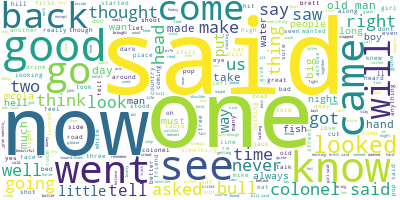

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


# K means



In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project gutenberg canada ebook this ebook is...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and cohn never had a chance of n...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...","""you forgot to get your paper"" i said""that\s s..."
4,0,"'""None of your exalted connections getting div...","""none of your exalted connections getting divo..."
...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too o...
535,5,"'others too, he thought. I live in a good tow...",others too he thought i live in a good townhe...
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do no...
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


,1,100678,1030,1081thi,10part,11,1100,118of,12,1253thi,1257thi,1300,1302thi,1305,1335,1700,172part,17th,183260,1890\,1899,1899-1961,1905,1909,1918,1925,1926edit,1927,1927edit,1929,1933edit,1933first,1935edit,1936,1936jonathan,1942,1950edit,1952,1952date,1952edit,...,yousaw,youse,yousink,yousmok,yousom,yousometh,youstop,yousuddenli,youth,youthat,youthink,youththeir,youto,youtri,youv,youviol,youwant,youwelcom,youwer,youwhat,youwil,youwould,yowlercamp-follow,yucatan,yuhh,yuletid,zebra,zeiss,zelli,zenzon,zigzag,zinc,zipper,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
df

,id,text,book_text_processed
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...
...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...


In [ ]:
len(np.unique(df['book_text_processed'].iloc[0].split(" ")))

141

In [ ]:
df['num_unique_words'] = df['book_text_processed'].apply(lambda x: len(np.unique(x.split(" "))))

In [ ]:
df = pd.merge(df, year_df, on='id',how='left')

In [ ]:
df

,id,text,book_text_processed,num_unique_words,year
0,0,'* A Project Gutenberg Canada Ebook *''This eb...,a project canada this is made available at no ...,141,1926
1,0,'of inferiority and shyness he had felt on bei...,of inferiority and shyness he had felt on bein...,212,1926
2,0,"'very forceful, and Cohn never had a chance of...",very forceful and never had a chance of not be...,196,1926
3,0,"'""You forgot to get your paper,"" I said.''""Tha...",you forgot to get your paper i said that s so ...,225,1926
4,0,"'""None of your exalted connections getting div...",none of your exalted getting no listen jake if...,199,1926
...,...,...,...,...,...
534,5,"'Now they have beaten me, he thought. I am to...",now they have beaten me he thought i am too ol...,205,1952
535,5,"'others too, he thought. I live in a good tow...",too he thought i live in a good could not talk...,208,1952
536,5,"'fight again, he thought. I hope so much I do...",fight again he thought i hope so much i do not...,211,1952
537,5,'sailed up onto the little patch of shingle be...,sailed up onto the little patch of shingle bel...,191,1952


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


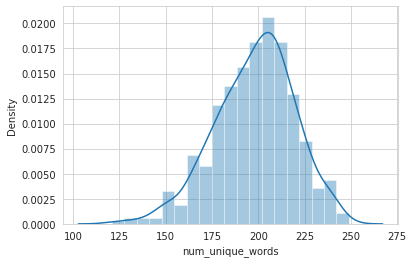

In [ ]:
sns.distplot(df['num_unique_words'])

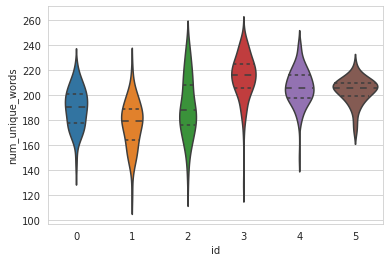

In [ ]:
sns.violinplot(x="id", y="num_unique_words", data=df, split=True, inner='quartile')

In [ ]:
!pip install linearmodels
from linearmodels import IV2SLS

In [ ]:
IV2SLS.from_formula("num_unique_words ~ year", data=df).fit()

OLS Estimation Summary                            
==============================================================================
Dep. Variable:       num_unique_words   R-squared:                      0.1357
Estimator:                        OLS   Adj. R-squared:                 0.1341
No. Observations:                 539   F-statistic:                    130.59
Date:                Wed, Sep 01 2021   P-value (F-stat)                0.0000
Time:                        14:42:42   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -1333.1     134.23    -9.9312     0.0000     -1596.2     -1070.0
year           0.7908     0.0692     11.428     0.0000      0.6552      0.9264
==============================================================================
OLSResults, id: 0x7fb12fe66ad0

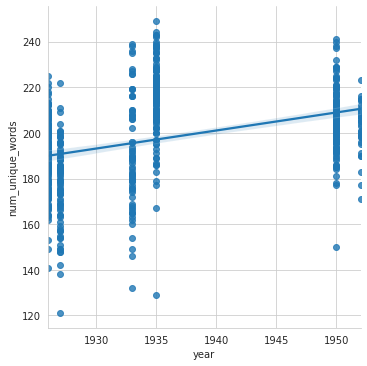

In [ ]:
sns.lmplot(x="year", y="num_unique_words", data=df)

as you write more, accumulate more vocabulary, the number of words increase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


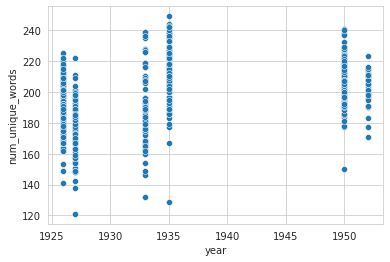

In [ ]:
sns.scatterplot('year', 'num_unique_words', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7ffb76e30b10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


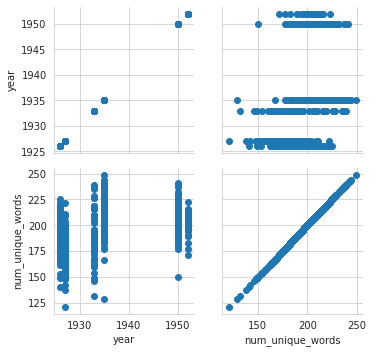

In [ ]:
g = sns.PairGrid(df, vars = ['year',  'num_unique_words'],  palette='RdBu_r')
g.map(plt.scatter)
g.add_legend()

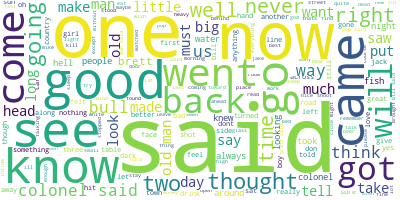

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()